<a href="https://colab.research.google.com/github/danielleitesoares/Work_Sentimental_Analyzer_Of_Restaurant_Issue/blob/main/Analise_dos_Sentimentos_Restaurantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de Sentimentos Restaurantes 
> Equipe: Leonardo Rocha, Paulo Correa e Daniel Soares
> Turma 02





### 1. Exibindo dados do Arquivo dataset-v2.dat

In [25]:
import pandas as pd
import seaborn as sns
import nltk
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
! git clone https://github.com/paulordie/sentimental_ds

Cloning into 'sentimental_ds'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 81 (delta 0), reused 1 (delta 0), pack-reused 77
Unpacking objects: 100% (81/81), done.
Checking out files: 100% (9/9), done.


In [4]:
%cd sentimental_ds/

/content/sentimental_ds


In [5]:
cols = ['title','reviewId', 'restaurantId','author','reviewBody','language','mobileDevice','userLocation','publicationDate','visitDate','ratingValue','itemReviewed','address','addressLocality','addressRegion','postalCode','country','website','email','phoneNumber','averageRating']
dados = pd.read_csv('pc-dataset-v2.csv', names= cols, engine = 'python', delimiter=',', skiprows=0, dtype = 'string')
dados.head()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
0,Jantar,692856288,2344932,larinhavercosa222,Comida maravilhosa. lugar do verdadeiro chicle...,pt,True,São Carlos. SP,26/07/2019,07/2019,5,Imperador dos Camar\u00F5es,Avenida Doutor Ant\u00F4nio Gouveia,<NA>,Alagoas,57030-170,Brasil,http://www.imperadordoscamaroes.com.br,contato@imperadordoscamaroes.com.br,+55 82 3231-4134,4.5
1,Uma boa experi\u00EAncia.,229208487,3720906,Pano P,Comida boa. drinks legais e um ambiente bem ac...,pt,True,Manaus. AM,16/09/2014,None,4,Guacamole Natal,Avenida Praia de Ponta Negra 9068 Ponta Negra,<NA>,Rio Grande do Norte,59092-100,Brasil,http://www.facebook.com/GuacamoleNatal,guacamolenatal@gmail.com,+55 84 3219-3646,4.5
2,Otimo self service,679002332,2248105,Magma100,Excelente pra ir com a fam\u00EDlia! \u00D3tim...,pt,True,Goiânia. GO,04/06/2019,07/2018,4,Chica Pitanga,Rua Petrolina 19,Recife,Pernambuco,51021-250,Brasil,http://www.chicapitanga.com.br,chicapitanga@chicapitanga.com.br,+55 81 3334-8260,4.5
3,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,Aracaju. SE,15/03/2016,01/2016,5,Sorvetes Vi Sabor,Avenida Francisco Porto 59 Grageru,Aracaju,Sergipe,<NA>,Brasil,None,None,None,4.0
4,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que j\u00E1 comi! Excelente...,pt,False,Rio de Janeiro. RJ,28/04/2015,04/2015,5,Z Deli Sandwich Shop,Rua Haddock Lobo 1386 Jardins,S\u00E3o Paulo,Estado de S\u00E3o Paulo,01414-002,Brasil,http://www.facebook.com/zdelisandwichshop/,None,551130830021,4.5


In [6]:
dados.tail()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
99995,Nova op\u00E7\u00E3o no Paseo!!!,672210394,17424548,Fabiano B,Ainda n\u00E3o inaugurado oficialmente. est\u0...,pt,True,Porto Alegre. RS,07/05/2019,05/2019,5,Boteco Maestro,Avenida Wenceslau Escobar 1823,Porto Alegre,Rio Grande do Sul,91900-000,Brasil,http://www.facebook.com/botecomaestro,None,+55 51 99353-6602,4.0
99996,Bom,380904400,2440184,Chris L,Bom atendimento. lugar bonito. comida muito go...,pt,True,Cork. Irlanda,08/06/2016,01/2016,4,Casa do Marqu\u00EAs,Rua Marques do Pombal. 1814 Higien\u00F3polis,Porto Alegre,Rio Grande do Sul,90540-000,Brasil,http://galeteriacasadomarques.com.br/,galeteriacasadomarques@galeteriacasadomarques....,+55 51 3343-4303,4.5
99997,Bom bar,186111858,2392996,Guilherme P,O Rio Scenarium \u00E9 uma das baladas mais fa...,pt,False,São Paulo. SP,27/11/2013,11/2013,4,Rio Scenarium,Rua do Lavradio 20 Centro,Rio de Janeiro,Estado do Rio de Janeiro,20230-070,Brasil,http://www.rioscenarium.art.br,None,+55 21-3147-9000,4.5
99998,Me senti enganada...,152745909,1062290,LisianeCohem,Fui por indica\u00E7\u00E3o e com boa expectat...,pt,True,Porto Alegre. RS,21/02/2013,None,2,Celeiro,Rua Dias Ferreira 199,Rio de Janeiro,Estado do Rio de Janeiro,22431-050,Brasil,http://www.celeiroculinaria.com.br,celeiro@celeiroculinaria.com.br,55 21 2274 7843,3.5
99999,Restaurante excelente,649755498,12433911,brunotulio,Experi\u00EAncia fant\u00E1stica com comida de...,pt,True,Manaus. AM,02/02/2019,02/2019,5,Coco Bambu Manaus,Avenida Coronel Teixeira. 5705 Ponta Negra. Sh...,Manaus,Rio Amazonas,69037-000,Brasil,http://www.facebook.com/cocobambumanausoficial/,rh.manaus@cocobambu.com,+55 92 3667-7430,5.0


In [7]:
dados.describe()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed,address,addressLocality,addressRegion,postalCode,country,website,email,phoneNumber,averageRating
count,100000,100000,100000,100000,100000,99983,100000,100000,100000,100000,100000,99995,98537,87725,99531,95505,100000,99999,99999,99999,90003
unique,64216,94203,23444,71850,90007,11,1145,6448,3194,124,3987,17119,14041,51,2943,7718,2810,8220,6482,9532,9
top,Muito bom,1098021,1065305,None,pt,pt,False,São Paulo. SP,None,5,5,Camar\u00F5es Restaurante,S\u00E3o Paulo,S\u00E3o Paulo,Estado de S\u00E3o Paulo,Brasil,Brasil,None,None,None,4.5
freq,1640,120,965,736,9901,89111,51783,13235,409,5217,45952,965,1680,15775,15775,9996,90003,18152,47385,6893,44028


In [11]:
localDoUsuario = dados.iloc[:,7:8]
localDoUsuario

,userLocation
0,São Carlos. SP
1,Manaus. AM
2,Goiânia. GO
3,Aracaju. SE
4,Rio de Janeiro. RJ
...,...
99995,Porto Alegre. RS
99996,Cork. Irlanda
99997,São Paulo. SP
99998,Porto Alegre. RS


In [18]:
diaDaVisita = dados.iloc[:,9:10]
diaDaVisita

,visitDate
0,07/2019
1,None
2,07/2018
3,01/2016
4,04/2015
...,...
99995,05/2019
99996,01/2016
99997,11/2013
99998,None


In [16]:
avaliacaoGeral = dados.iloc[:,10:11]
avaliacaoGeral.describe()

,ratingValue
count,100000
unique,3987
top,5
freq,45952


In [20]:
dispositivoMovel = dados.iloc[:,6:7]
dispositivoMovel

,mobileDevice
0,True
1,True
2,True
3,False
4,False
...,...
99995,True
99996,True
99997,False
99998,True


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


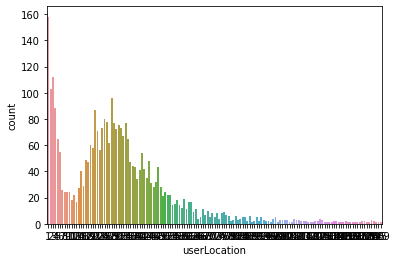

In [27]:
sns.countplot(dados.groupby('publicationDate').userLocation.count());

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


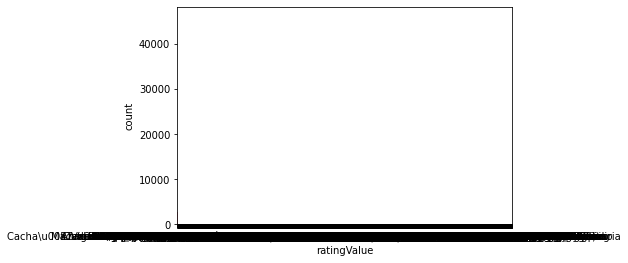

In [28]:
sns.countplot(dados.ratingValue);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


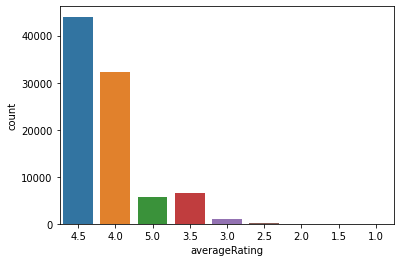

In [29]:
sns.countplot(dados.averageRating);

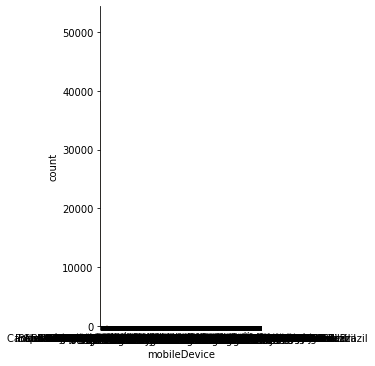

In [32]:
sns.catplot(x="mobileDevice", kind="count", palette="ch:.25", data=dados)

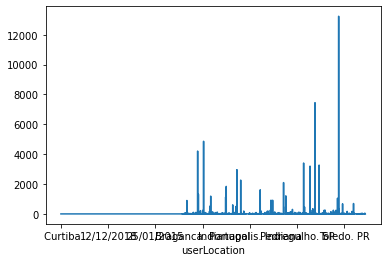

In [33]:
dados.groupby('userLocation').averageRating.count().plot()

In [34]:
def translateByTextBlob():
  dic2 = pd.DataFrame(dados)
  dic2['reviewBody']
  count = 0
  for _x in dic2['reviewBody']:
      count = count + 1  
      print(type(_x))
      x = _x.encode('utf-16', 'surrogatepass').decode('utf-16')
      print(x)
      
      print(count) #vai imprimir todos os reviews= 
          
      comentario_blob = TextBlob(x)
      print(type(comentario_blob))
      comentario_blob_us = comentario_blob.translate(to='us')

      for sentence_br, sentence in zip(comentario_blob.sentences, comentario_blob_us.sentences):
          print(sentence_br, ':', sentence.sentiment.subjectivity)
      if count == 5:
          print('**End**')
          break  

In [35]:
translateByTextBlob()

<class 'str'>
Comida maravilhosa. lugar do verdadeiro chiclete de camar\u00E3o. \nO gar\u00E7om \u00C9ric Lima nos atendeu muito bem. pretendemos voltar assim que poss\u00EDvel.
1
<class 'textblob.blob.TextBlob'>
Comida maravilhosa. : 1.0
lugar do verdadeiro chiclete de camar\u00E3o. : 0.30000000000000004
\nO gar\u00E7om \u00C9ric Lima nos atendeu muito bem. : 0.3
pretendemos voltar assim que poss\u00EDvel. : 1.0
<class 'str'>
Comida boa. drinks legais e um ambiente bem aconchegante. \nProvamos muitas coisas e tudo nos agradou. Principalmente um pato servido em um dos pratos da casa. sensacional!
2
<class 'textblob.blob.TextBlob'>
Comida boa. : 1.0
drinks legais e um ambiente bem aconchegante. : 0.8125
\nProvamos muitas coisas e tudo nos agradou. : 1.0
Principalmente um pato servido em um dos pratos da casa. : 1.0
sensacional! : 0.6666666666666666
<class 'str'>
Excelente pra ir com a fam\u00EDlia! \u00D3tima Comida. ambiente agrad\u00E1vel. bom atendimento e estacionamento. Vale a pena